In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.chdir('E:\CURSOS\LIBROS  PYTHON')
os.getcwd()

'E:\\CURSOS\\LIBROS  PYTHON'

# Load Data

In [4]:
data = pd.read_csv('shoes_dataset.csv')
data.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,$159.00,0%,$159.00
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,$199.00,20%,$159.20
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,$149.00,20%,$119.20
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,$159.00,0%,$159.00
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,$159.00,0%,$159.00


In [5]:
data

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,$159.00,0%,$159.00
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,$199.00,20%,$159.20
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,$149.00,20%,$119.20
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,$159.00,0%,$159.00
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,$159.00,0%,$159.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,12/31/2016,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,$139.00,0%,$139.00
14963,65774,12/31/2016,United States,2181,US12,Female,12.0,42-43,10.0,$149.00,0%,$149.00
14964,65775,12/31/2016,Canada,2203,CAN6,Male,10.5,43-44,10.0,$179.00,30%,$125.30
14965,65776,12/31/2016,Germany,2231,GER1,Female,9.5,40,7.5,$199.00,0%,$199.00


# Data Cleaning

In [6]:
# Convertir fecha
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      14967 non-null  int64  
 1   Date           14967 non-null  object 
 2   Country        14967 non-null  object 
 3   ProductID      14967 non-null  int64  
 4   Shop           14967 non-null  object 
 5   Gender         14967 non-null  object 
 6   Size (US)      14967 non-null  float64
 7   Size (Europe)  14967 non-null  object 
 8   Size (UK)      14967 non-null  float64
 9   UnitPrice      14967 non-null  object 
 10  Discount       14967 non-null  object 
 11  SalePrice      14967 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.4+ MB


In [7]:
# Se requiere que Data en lugar de object sea date
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  object        
 10  Discount       14967 non-null  object        
 11  SalePrice      14967 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 1.4+ MB


In [9]:
#Extraer parámetros de fecha
data['Year'] = data['Date'].dt.year #Extraer el año
data['Month'] = data['Date'].dt.month #Extraer el mes
data['Day'] = data['Date'].dt.day #Extraer el día

In [10]:
#Analizar los precios, de string a float()
data['SalePrice'] = data['SalePrice'].apply(lambda x: float(x[2:])) # 2 porque hay un espacio adelante del símbolo de dólar
data['UnitPrice'] = data['UnitPrice'].apply(lambda x: float(x[2:])) #Se alica a cada registro

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  float64       
 10  Discount       14967 non-null  object        
 11  SalePrice      14967 non-null  float64       
 12  Year           14967 non-null  int64         
 13  Month          14967 non-null  int64         
 14  Day            14967 non-null  int64         
dtypes: datetime64[ns](1

In [28]:
data.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Year,Month,Day
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159.0,0%,159.0,2014,1,1
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199.0,20%,159.2,2014,1,1
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149.0,20%,119.2,2014,1,1
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159.0,0%,159.0,2014,1,1
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159.0,0%,159.0,2014,1,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  float64       
 10  Discount       14967 non-null  object        
 11  SalePrice      14967 non-null  float64       
 12  Year           14967 non-null  int64         
 13  Month          14967 non-null  int64         
 14  Day            14967 non-null  int64         
dtypes: datetime64[ns](1

In [12]:
data.describe()

,InvoiceNo,ProductID,Size (US),Size (UK),UnitPrice,SalePrice,Year,Month,Day
count,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000
mean,59050.261509,2195.325115,9.195630,8.089497,164.171377,143.987913,2015.308211,6.689517,15.745306
std,3889.598714,27.633526,1.511719,1.970014,22.940544,35.180799,0.762320,3.319909,8.719764
min,52389.000000,2147.000000,4.500000,2.500000,129.000000,64.500000,2014.000000,1.000000,1.000000
25%,55648.500000,2172.000000,8.000000,6.500000,149.000000,125.100000,2015.000000,4.000000,8.000000
50%,59092.000000,2195.000000,9.000000,8.500000,159.000000,149.000000,2015.000000,7.000000,16.000000
75%,62433.000000,2219.000000,10.000000,9.500000,179.000000,169.000000,2016.000000,10.000000,23.000000
max,65777.000000,2242.000000,15.000000,14.500000,199.000000,199.000000,2016.000000,12.000000,31.000000


# Análisis gráfico

In [16]:
data.columns

Index(['InvoiceNo', 'Date', 'Country', 'ProductID', 'Shop', 'Gender',
       'Size (US)', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount',
       'SalePrice', 'Year', 'Month', 'Day'],
      dtype='object')

In [17]:
categorical_variables = ['Country','ProductID','Shop','Gender','Size (US)','Size (Europe)','Size (UK)','Discount','Year','Month','Day']
numerical_variable = ['UnitPrice', 'SalePrice']

In [20]:
for cat_variable in categorical_variables:
    frequency = data[cat_variable].value_counts()
    data_frequency = pd.DataFrame({cat_variable:frequency.index.tolist(), 'quantity': frequency.tolist()})
    print(data_frequency)


          Country  quantity
0   United States      5886
1         Germany      4392
2          Canada      2952
3  United Kingdom      1737
    ProductID  quantity
0        2190       207
1        2213       204
2        2226       204
3        2192       201
4        2158       198
..        ...       ...
91       2155       120
92       2194       117
93       2229       114
94       2162       105
95       2164        99

[96 rows x 2 columns]
    Shop  quantity
0   GER2      1947
1   GER1      1836
2   US15      1044
3   US13      1011
4   US12       972
5   CAN6       861
6   US14       633
7   GER3       609
8   CAN2       438
9   CAN3       435
10  CAN7       435
11  CAN5       411
12   UK3       372
13  CAN1       372
14   UK4       351
15   UK1       345
16   UK2       345
17   UK5       324
18   US1       234
19   US6       225
20   US8       225
21   US7       222
22  US10       216
23   US3       207
24   US9       195
25   US5       192
26   US4       180
27  US11       18

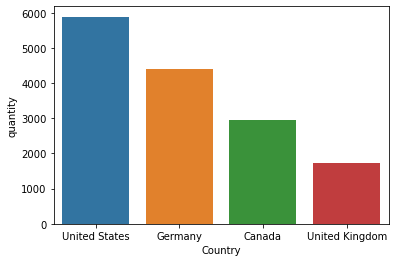

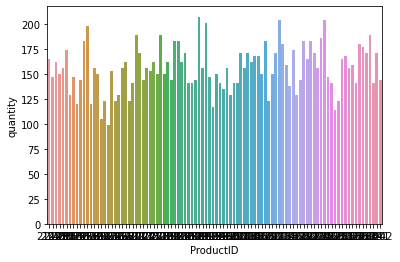

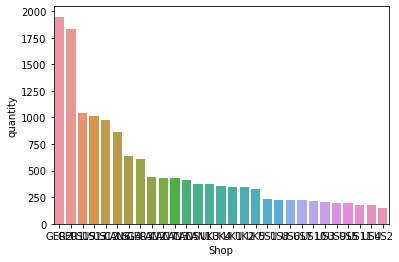

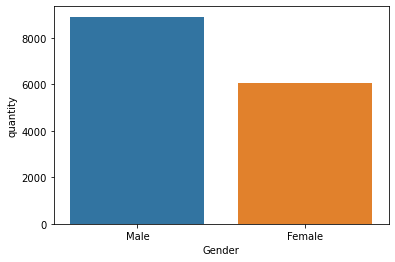

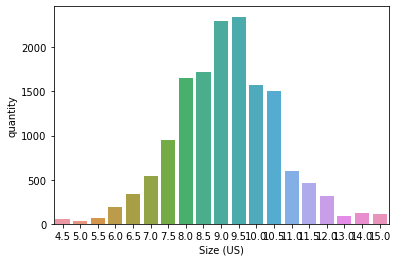

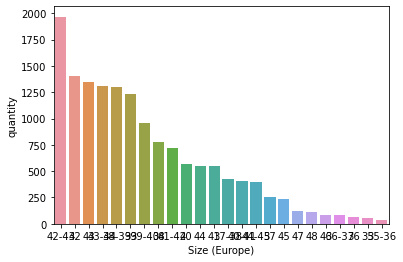

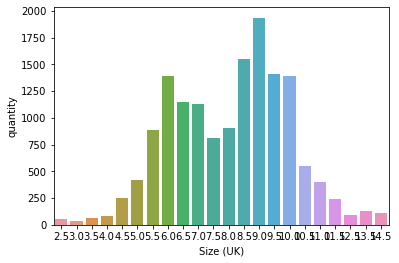

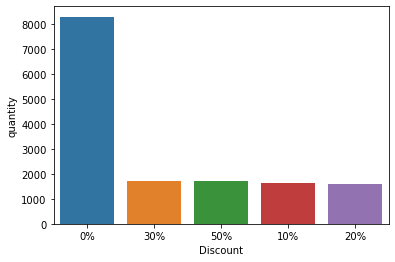

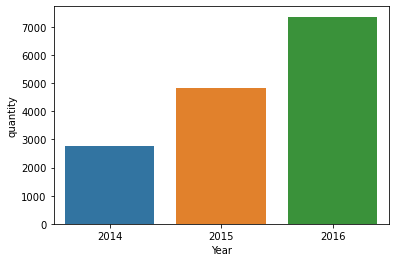

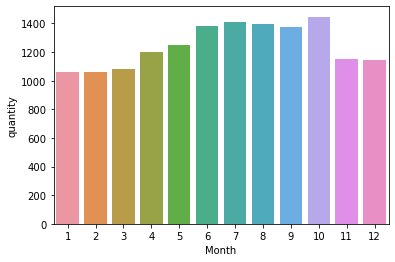

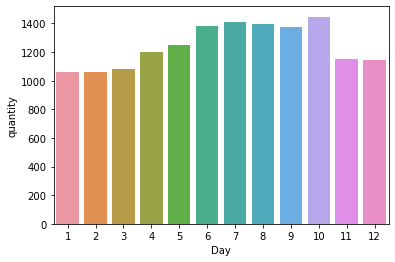

In [44]:
for cat_variable in categorical_variables:
    frequency = data[cat_variable].value_counts()
    data_frequency = pd.DataFrame({cat_variable:frequency.index.tolist(), 'quantity': frequency.tolist()})
    sns.barplot(x = cat_variable, y = 'quantity', data = data_frequency)
    plt.show()
    

In [21]:
# Analizando la frecuencia de ventas en tiendas
#Método: value_counts()
frequency_shops = data['Shop'].value_counts().head(30)
frequency_shops

GER2    1947
GER1    1836
US15    1044
US13    1011
US12     972
CAN6     861
US14     633
GER3     609
CAN2     438
CAN3     435
CAN7     435
CAN5     411
UK3      372
CAN1     372
UK4      351
UK1      345
UK2      345
UK5      324
US1      234
US6      225
US8      225
US7      222
US10     216
US3      207
US9      195
US5      192
US4      180
US11     180
US2      150
Name: Shop, dtype: int64

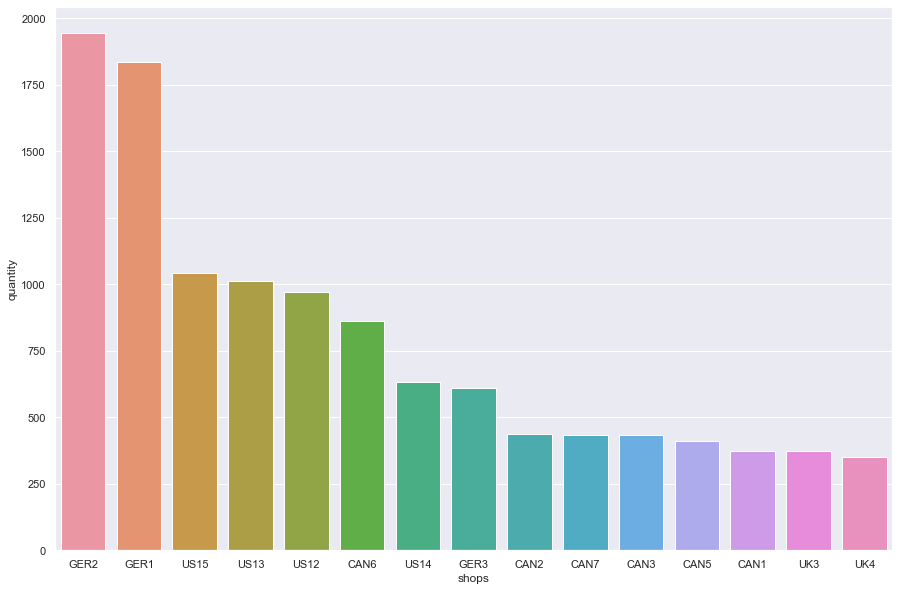

In [58]:
# Analizando la frecuencia de ventas en tiendas
#Método: value_counts()
sns.set(rc = {'figure.figsize':(15,10)})
frequency_shops = data['Shop'].value_counts().head(15)
df_frequency_shops = pd.DataFrame({'shops':frequency_shops.index.tolist(), 'quantity': frequency_shops.tolist()})
sns.barplot( x = 'shops', y = 'quantity', data = df_frequency_shops, )

# Histogram of numeric variables

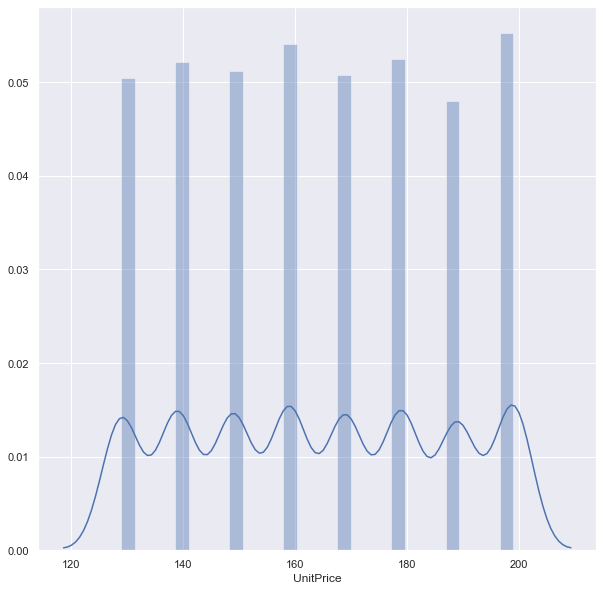

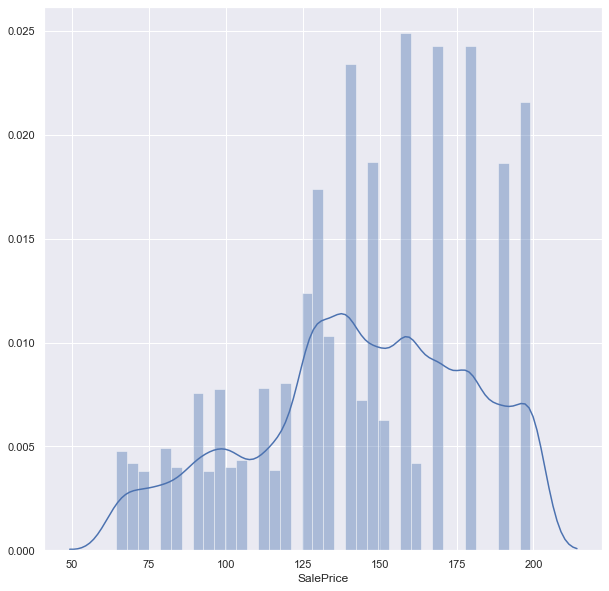

In [70]:
sns.set(rc = {'figure.figsize':(10,10)})
for num in numerical_variable:
    sns.distplot(data[num], bins = 'auto')
    plt.show()

# Correlation

In [71]:
#function corr()
corr = data.corr()
print(corr)

           InvoiceNo  ProductID  Size (US)  Size (UK)  UnitPrice  SalePrice  \
InvoiceNo   1.000000   0.003446  -0.011095  -0.005791  -0.019302  -0.016736   
ProductID   0.003446   1.000000  -0.030131  -0.029968   0.029623   0.012046   
Size (US)  -0.011095  -0.030131   1.000000   0.944293  -0.020793  -0.001599   
Size (UK)  -0.005791  -0.029968   0.944293   1.000000  -0.019445  -0.003161   
UnitPrice  -0.019302   0.029623  -0.020793  -0.019445   1.000000   0.605639   
SalePrice  -0.016736   0.012046  -0.001599  -0.003161   0.605639   1.000000   
Year        0.909878   0.008498  -0.016028  -0.010760  -0.021188  -0.016176   
Month       0.352655  -0.010678   0.002577   0.005981   0.008345  -0.000989   
Day         0.352655  -0.010678   0.002577   0.005981   0.008345  -0.000989   

               Year     Month       Day  
InvoiceNo  0.909878  0.352655  0.352655  
ProductID  0.008498 -0.010678 -0.010678  
Size (US) -0.016028  0.002577  0.002577  
Size (UK) -0.010760  0.005981  0.005981  

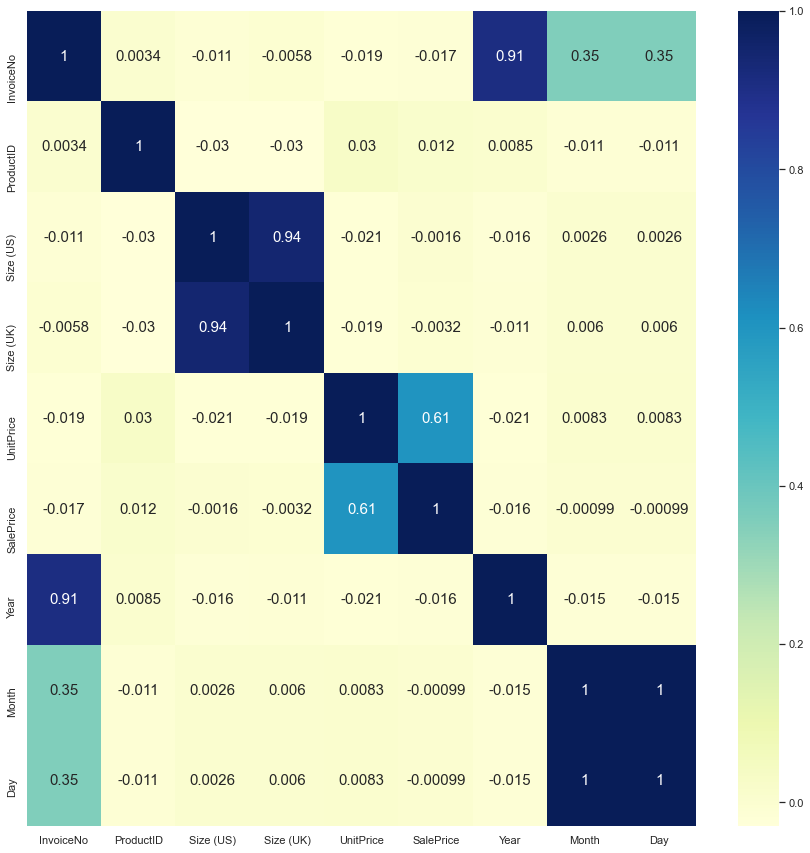

In [76]:
#function corr()
corr = data.corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corr, annot = True, annot_kws={'size': 15}, cmap="YlGnBu")

# Confidence Intervals

In [88]:
#Confidence Interval
#"Parameters"
# sample mean
# significance level
#sample standard deviation
#t-score, depends on a and degrees of freedom n - 1
# x_bar +- (t[alfa/2,n -1] * S/ sqrt(n))

# sample mean
grouped = data[(data['Year']!= 2014) & 
               (data['Gender'] == 'Male') & 
               (data['Country'] == 'United States')].groupby(['Size (US)','Year','Month']).size().unstack(level = 0).fillna(value = 0)
grouped

# El método size imprime el groupby, nos da la cntidad un conteo
#El método unstack ordena registros y apila de acuerdo al nivel del group by
#fillna():llena valores NA


Size (US)   6.0   6.5   7.0   7.5   8.0   8.5   9.0   9.5   10.0  10.5  11.0  \
Year Month                                                                     
2015 1       0.0   4.0   0.0   0.0   5.0   4.0  10.0  18.0   8.0   7.0   5.0   
     2       0.0   1.0   0.0   1.0   3.0   5.0  14.0  16.0  13.0  13.0   5.0   
     3       0.0   0.0   0.0   2.0   1.0   3.0   7.0  23.0  13.0   8.0   4.0   
     4       0.0   1.0   0.0   1.0   0.0   1.0   9.0  15.0  15.0   8.0   7.0   
     5       3.0   0.0   1.0   0.0   6.0   2.0  17.0  16.0   7.0  15.0   5.0   
     6       1.0   0.0   2.0   0.0   6.0  11.0  16.0  16.0  20.0  10.0   5.0   
     7       1.0   2.0   1.0   3.0   4.0   6.0  20.0  19.0  22.0  16.0   4.0   
     8       3.0   3.0   0.0   2.0   0.0   6.0  21.0  26.0  18.0   8.0   6.0   
     9       5.0   0.0   1.0   3.0   5.0   4.0  13.0  25.0  22.0  16.0   3.0   
     10      4.0   1.0   2.0   2.0   6.0  12.0  17.0  17.0  15.0  16.0   5.0   
     11      0.0   3.0   2.0   2.0   3.0   4.0  10.0  35.0  11.0  17.0   5.0   
     12      0.0   3.0   3.0   2.0   3.0   2.0  12.0  24.0  14.0  14.0  10.0   
2016 1       4.0   3.0   0.0   3.0   7.0  12.0  17.0  19.0  17.0  13.0   5.0   
     2       1.0   2.0   0.0   2.0   9.0  12.0  13.0  25.0  26.0  16.0  16.0   
     3       3.0   0.0   1.0   3.0   7.0   8.0  13.0  27.0  26.0  22.0  13.0   
     4       1.0   1.0   0.0   1.0   3.0   8.0  11.0  24.0  19.0  14.0  10.0   
     5       3.0   0.0   6.0   7.0  12.0  15.0  21.0  26.0  16.0  28.0  10.0   
     6       3.0   0.0   4.0   0.0   2.0   9.0  22.0  33.0  31.0  19.0  11.0   
     7       3.0   1.0   4.0   7.0   9.0  17.0  25.0  25.0  25.0  18.0  15.0   
     8       4.0   7.0   2.0   3.0   4.0  17.0  30.0  47.0  24.0  15.0   8.0   
     9       3.0   2.0   3.0   4.0   7.0   6.0  26.0  31.0  23.0  19.0   9.0   
     10      7.0   1.0   0.0   6.0   5.0   9.0  25.0  44.0  31.0  21.0   7.0   
     11      3.0   2.0   0.0   1.0   2.0  10.0  13.0  37.0  15.0  16.0   6.0   
     12      0.0   1.0   0.0   1.0   6.0   6.0  10.0  26.0  20.0  10.0   7.0   

Size (US)   11.5  12.0  13.0  14.0  15.0  
Year Month                                
2015 1       3.0   1.0   0.0   1.0   0.0  
     2       3.0   0.0   0.0   2.0   0.0  
     3       2.0   0.0   1.0   1.0   0.0  
     4       3.0   3.0   0.0   2.0   0.0  
     5       6.0   1.0   1.0   1.0   1.0  
     6       9.0   4.0   3.0   0.0   0.0  
     7       6.0   1.0   1.0   3.0   0.0  
     8       6.0   2.0   0.0   3.0   1.0  
     9       3.0   4.0   0.0   0.0   1.0  
     10      8.0   3.0   3.0   1.0   0.0  
     11      3.0   6.0   0.0   2.0   1.0  
     12      7.0   3.0   1.0   2.0   1.0  
2016 1       4.0   3.0   1.0   2.0   0.0  
     2       3.0   0.0   1.0   6.0   0.0  
     3       6.0   0.0   2.0   3.0   0.0  
     4       3.0   4.0   0.0   3.0   1.0  
     5       3.0   4.0   3.0   5.0   1.0  
     6       5.0   4.0   2.0   3.0   0.0  
     7       6.0   3.0   1.0   2.0   4.0  
     8       4.0  12.0   0.0   1.0   0.0  
     9       5.0   4.0   0.0   0.0   0.0  
     10     12.0   9.0   4.0   1.0   0.0  
     11     13.0   2.0   3.0   2.0   0.0  
     12      5.0   1.0   2.0   1.0   2.0

In [91]:
means = []
standard_errors = []

for column in grouped.columns:
    means.append(grouped[column].mean())
    standard_errors.append(grouped[column].sem())

#function sem(): It's a function of pandas library that allow us to get the standar error of one sample

[2.1666666666666665, 1.5833333333333333, 1.3333333333333333, 2.3333333333333335, 4.791666666666667, 7.875, 16.333333333333332, 25.583333333333332, 18.791666666666668, 14.958333333333334, 7.541666666666667, 5.333333333333333, 3.0833333333333335, 1.2083333333333333, 1.9583333333333333, 0.5416666666666666]
[0.3931785497463924, 0.34005896050296563, 0.33872451862377523, 0.41119596982930745, 0.5988490369718612, 0.9446886228821106, 1.2621391242973676, 1.7661436195916105, 1.3255832277604478, 1.0205837464779064, 0.7197502753991818, 0.5825564184491736, 0.5802194320875341, 0.25522912884810073, 0.29781308374589854, 0.19014836566792676]


In [94]:
d = {'means': means, 'std_error': standard_errors}
df_calculations = pd.DataFrame( data = d, index = grouped.columns)
print(df_calculations)

               means  std_error
Size (US)                      
6.0         2.166667   0.393179
6.5         1.583333   0.340059
7.0         1.333333   0.338725
7.5         2.333333   0.411196
8.0         4.791667   0.598849
8.5         7.875000   0.944689
9.0        16.333333   1.262139
9.5        25.583333   1.766144
10.0       18.791667   1.325583
10.5       14.958333   1.020584
11.0        7.541667   0.719750
11.5        5.333333   0.582556
12.0        3.083333   0.580219
13.0        1.208333   0.255229
14.0        1.958333   0.297813
15.0        0.541667   0.190148


In [99]:
# t-score: de tablas () = 2.07

df_calculations['error_margin'] = df_calculations['std_error'].apply(lambda x: x*2.07)

#Confidence Intervals
df_calculations['low_margin'] = df_calculations.apply(lambda x: x['means'] - x['error_margin'], axis = 1) #axis 1 column
df_calculations['up_margin'] = df_calculations.apply(lambda x: x['means'] + x['error_margin'],axis = 1 )
print(df_calculations)

               means  std_error  error_margin  low_margin  up_margin
Size (US)                                                           
6.0         2.166667   0.393179      0.813880    1.352787   2.980546
6.5         1.583333   0.340059      0.703922    0.879411   2.287255
7.0         1.333333   0.338725      0.701160    0.632174   2.034493
7.5         2.333333   0.411196      0.851176    1.482158   3.184509
8.0         4.791667   0.598849      1.239618    3.552049   6.031284
8.5         7.875000   0.944689      1.955505    5.919495   9.830505
9.0        16.333333   1.262139      2.612628   13.720705  18.945961
9.5        25.583333   1.766144      3.655917   21.927416  29.239251
10.0       18.791667   1.325583      2.743957   16.047709  21.535624
10.5       14.958333   1.020584      2.112608   12.845725  17.070942
11.0        7.541667   0.719750      1.489883    6.051784   9.031550
11.5        5.333333   0.582556      1.205892    4.127442   6.539225
12.0        3.083333   0.580219   

In [101]:
#Redondeo
#importar librería math
#math.ceil: redondeo
import math
df_calculations['math_round_up'] = df_calculations.apply(lambda x: math.ceil(x['up_margin']), axis = 1)
df_calculations

,means,std_error,error_margin,low_margin,up_margin,math_round_up
Size (US),,,,,,
6.0,2.166667,0.393179,0.813880,1.352787,2.980546,3
6.5,1.583333,0.340059,0.703922,0.879411,2.287255,3
7.0,1.333333,0.338725,0.701160,0.632174,2.034493,3
7.5,2.333333,0.411196,0.851176,1.482158,3.184509,4
8.0,4.791667,0.598849,1.239618,3.552049,6.031284,7
8.5,7.875000,0.944689,1.955505,5.919495,9.830505,10
9.0,16.333333,1.262139,2.612628,13.720705,18.945961,19
9.5,25.583333,1.766144,3.655917,21.927416,29.239251,30
10.0,18.791667,1.325583,2.743957,16.047709,21.535624,22
